## Using Chaotic maps for images encryption and decrpytion

In [1]:
import numpy as np
import random
import math
import os

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import time

In [3]:
def getImageMatrix(imageName):
    im = Image.open(imageName) 
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
        color = 0
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color

Using the above function to load an image

In [4]:
img_matrix, w, h, c = getImageMatrix("test1.jpg")

In [5]:
w, h, c

(8192, 5461, 1)

In [6]:
len(img_matrix), len(img_matrix[0])

(8192, 5461)

Using Open CV to load the image

In [7]:
img = cv2.cvtColor(cv2.imread("Test1.jpg"), cv2.COLOR_BGR2RGB)

In [8]:
img.shape

(5461, 8192, 3)

In [9]:
im = cv2.resize(img, (250, 250), interpolation = cv2.INTER_LINEAR)

Display the image

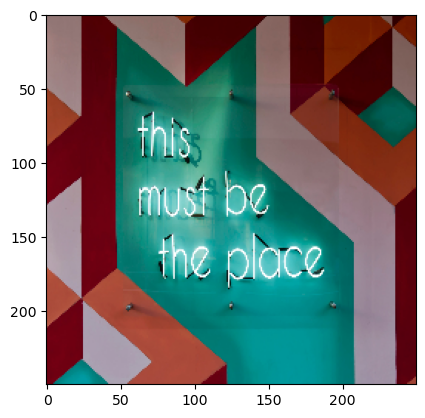

In [10]:
plt.imshow(im.astype('int32'))

In [12]:
img2 = cv2.cvtColor(cv2.imread("HorizonZero.png"), cv2.COLOR_BGR2RGB)

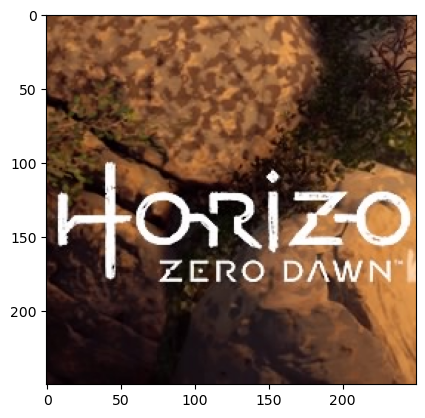

In [13]:
plt.imshow(img2)

In [14]:
img2.shape

(250, 250, 3)

### Arnold Cat Map

Arnold's cat map is a chaotic map from the torus into itself, named after Vladimir Arnold, who demonstrated its effects in the 1960s using an image of a cat, hence the name. It applies a tranform on the image that essentially shuffles the pixels by stretching anf folding thethe image.

The transform applied on the image is:  
R([x,y]) = [(x + y) mod n, (x + 2y) mod n]  
where n is the dimensions of the image

When the transformation is repeated enough times, the original image will reappear.
The number of iterations 'n' at which the original image will reappear is given by these rules of thumb:
Here 'd' is the dimension of the square image:

1.   if d =  2.(5^i) for i >=1, n = 3*d
2.   if d = (5^i) for i >=1, n = 2*d
3.   if d = 6.(5^i) for i>=1, n = 2*d
4.   else n <= 12*d / 7

This periodicity forms the crux of the encryption process. Here key is the number of iterations of transformations initially applied to get the encrypted image. n - key is the number of rounds of transformations applied to get the decrypted image.

In [15]:
width = img2.shape[0]
height = img2.shape[1]
channels = img2.shape[2]

In [16]:
width, height, channels

(250, 250, 3)

In [17]:
def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]  
    return img_arnold   

In [18]:
def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    img = cv2.resize(img, (250, 250), interpolation = cv2.INTER_LINEAR)
    for i in range (0,key):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('.')[0] + "_ArnoldcatEnc.png", img)
    return img

In [19]:
def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(math.log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(math.log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(math.log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('_')[0] + "_ArnoldcatDec.png",img)
    return img

In [20]:
import time

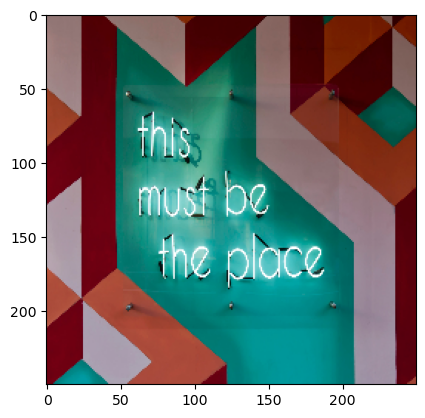

In [21]:
plt.imshow(im)

In [22]:
start = time.time()
ArnoldCatEncryptionIm = ArnoldCatEncryption("Test1.jpg", 80)
print("Time taken: ", time.time() - start)

Time taken:  7.379829168319702


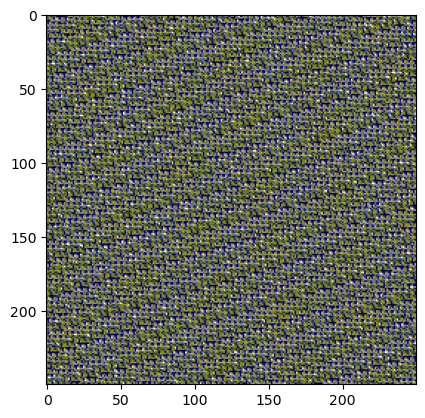

In [23]:
plt.imshow(ArnoldCatEncryptionIm.astype('int32'))

Converting the above into a video for visulization

In [47]:
img = cv2.imread("Test1.jpg")
images = [img]
for i in range (0,20):
    img = ArnoldCatTransform(img, i)
    images.append(img.astype('int32'))

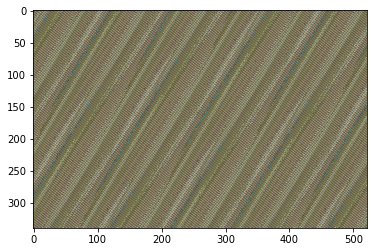

In [50]:
plt.imshow(images[-1])

In [51]:
video = cv2.VideoWriter("Test.avi", 0, 1, (250, 250))
for image in images:
    video.write(image)
video.release()

Decryption

In [36]:
import time

In [48]:
start = time.time()
ArnoldCatDecryptionIm = ArnoldCatDecryption("Test1_ArnoldcatEnc.png", 80)
time_taken = time.time() - start
print("Time Taken: ", time_taken)

Time Taken:  41.147599935531616


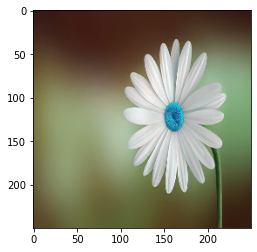

In [28]:
plt.imshow(ArnoldCatDecryptionIm.astype('int32'))   

In [52]:
img = cv2.imread("Test1_ArnoldcatEnc.png")
rows, cols, ch = img.shape
dimension = rows
decrypt_it = dimension
if (dimension%2==0) and 5**int(round(math.log(dimension/2,5))) == int(dimension/2):
    decrypt_it = 3*dimension
elif 5**int(round(math.log(dimension,5))) == int(dimension):
    decrypt_it = 2*dimension
elif (dimension%6==0) and  5**int(round(math.log(dimension/6,5))) == int(dimension/6):
    decrypt_it = 2*dimension
else:
    decrypt_it = int(12*dimension/7)
print(decrypt_it)

750


In [53]:
images = [img]
for i in range(20, decrypt_it):
    img = ArnoldCatTransform(img, i).astype('int32')
    images.append(img)

In [79]:
video = cv2.VideoWriter("Test_Decrypt.avi", 0, 1, (250, 250))
for image in images:
    video.write(image)
video.release()

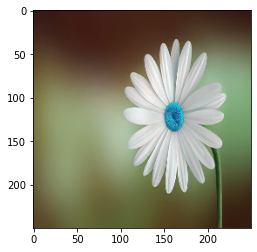

In [72]:
plt.imshow(images[-1])

Seeing the pattern in the algorithm

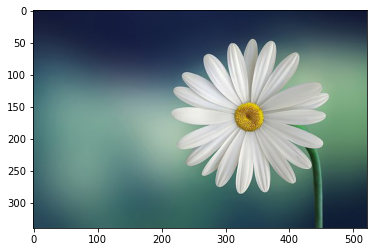

In [85]:
img = cv2.cvtColor(cv2.imread("Test1.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [111]:
img = cv2.imread("Test1.jpg")
img = cv2.resize(img, (250, 250), interpolation = cv2.INTER_LINEAR)
images = [img]
for i in range (0, 750):
    img = ArnoldCatTransform(img, i)
    images.append(img.astype('int32'))

In [112]:
points = []
for im in images:
    points.append(im[10, 10, 1])

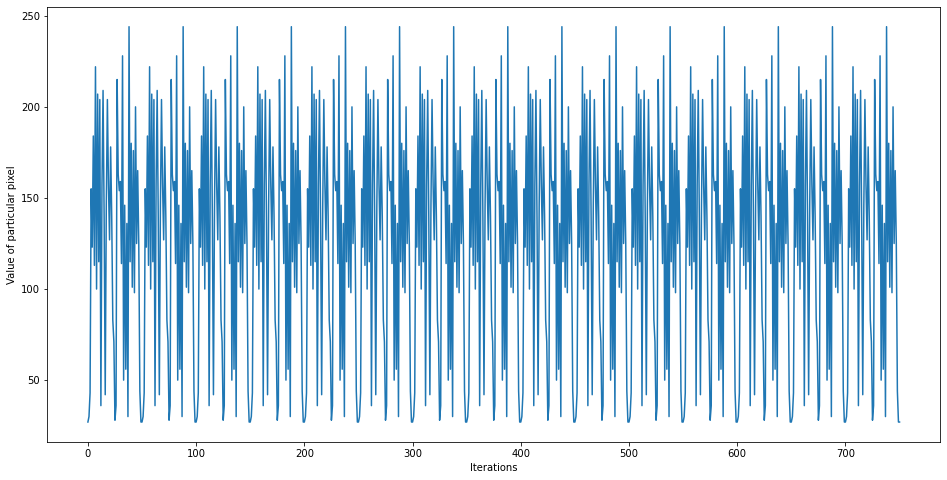

In [116]:
plt.figure(figsize=(16, 8))
plt.plot(points)
plt.xlabel("Iterations")
plt.ylabel("Value of particular pixel");

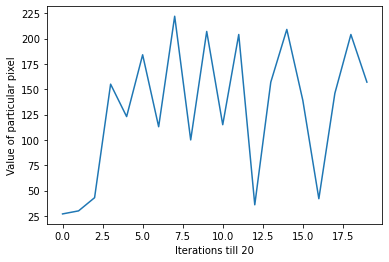

In [117]:
plt.plot(points[:20])
plt.xlabel("Iterations till 20")
plt.ylabel("Value of particular pixel");

Text(0, 0.5, 'Value of particular pixel')

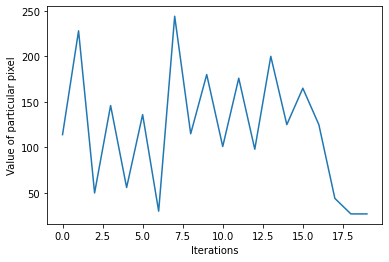

In [118]:
plt.plot(points[-20:])
plt.xlabel("Iterations")
plt.ylabel("Value of particular pixel")

In [119]:
points[0], points[-1]

(27, 27)

So we can clearly see that the values are chaotic and cannot be traced unless the initial value (key) and image dimention are known else we cant decrypt it.